# EV Charging Station

## Import Modules/Libraries

In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in csv file from local machine
csv_location = r"C:\Users\cijos\OneDrive\Desktop\Final Capstone\electric charging stations dataset.csv"

In [3]:
#read the csv file into a pandas dataframe
df = pd.read_csv(csv_location)
df

C:\Users\cijos\AppData\Local\Temp\ipykernel_10716\3257503776.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_location)


,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Expected Date,Groups With Access Code,Access Days Time,...,Date Last Confirmed,ID,Owner Type Code,Open Date,EV Connector Types,Country,Access Code,Facility Type,EV Pricing,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,E,NaN,Private,Fleet use only,...,1/10/2023,1517,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,E,NaN,Private,NaN,...,1/10/2023,1519,LG,2/28/2020,J1772,US,private,UTILITY,Free,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,E,NaN,Public,5:30am-9pm; pay lot,...,1/10/2023,1523,P,8/30/1995,J1772,US,public,PARKING_GARAGE,Free; parking fee,False
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,E,NaN,Private,For fleet and employee use only,...,1/10/2023,1525,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,E,NaN,Private,Fleet use only,...,1/10/2023,1531,LG,5/1/2018,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60428,ELEC,10401 South Clare Avenue (US-X52-57X-1B),10401 South Clare Avenue,Clare,MI,48617,E,NaN,Public,24 hours daily; for Rivian use only,...,4/12/2023,259037,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN,NaN
60429,ELEC,10401 South Clare Avenue (US-X52-57X-1C),10401 South Clare Avenue,Clare,MI,48617,E,NaN,Public,24 hours daily; for Rivian use only,...,4/12/2023,259038,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN,NaN
60430,ELEC,10401 South Clare Avenue (US-X52-57X-2A),10401 South Clare Avenue,Clare,MI,48617,E,NaN,Public,24 hours daily; for Rivian use only,...,4/12/2023,259039,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN,NaN
60431,ELEC,10401 South Clare Avenue (US-KGZ-D83-1),10401 South Clare Avenue,Clare,MI,48617,E,NaN,Public,24 hours daily,...,4/12/2023,259040,NaN,4/12/2023,J1772,US,public,PUBLIC,NaN,NaN


In [4]:
# Creating a copy of dataframe as backup
df_copy = df

In [5]:
# Total number of rows and columns
df.shape

(60433, 24)

In [6]:
# Check for missing data, count null values
df.isnull().sum()

Fuel Type Code                 0
Station Name                   1
Street Address                33
City                           0
State                         23
ZIP                            0
Status Code                    0
Expected Date              56239
Groups With Access Code        0
Access Days Time           10896
EV Network                     4
Geocode Status                 0
Latitude                       0
Longitude                      0
Date Last Confirmed           21
ID                             0
Owner Type Code            43186
Open Date                    101
EV Connector Types            45
Country                        0
Access Code                    1
Facility Type              44361
EV Pricing                 45456
Restricted Access          50890
dtype: int64

In [7]:
#Look for the top 5 rows
df.head()

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Expected Date,Groups With Access Code,Access Days Time,...,Date Last Confirmed,ID,Owner Type Code,Open Date,EV Connector Types,Country,Access Code,Facility Type,EV Pricing,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,E,NaN,Private,Fleet use only,...,1/10/2023,1517,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,E,NaN,Private,NaN,...,1/10/2023,1519,LG,2/28/2020,J1772,US,private,UTILITY,Free,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,E,NaN,Public,5:30am-9pm; pay lot,...,1/10/2023,1523,P,8/30/1995,J1772,US,public,PARKING_GARAGE,Free; parking fee,False
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,E,NaN,Private,For fleet and employee use only,...,1/10/2023,1525,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,E,NaN,Private,Fleet use only,...,1/10/2023,1531,LG,5/1/2018,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN,NaN


In [8]:
# Check the datatypes
df.dtypes

Fuel Type Code              object
Station Name                object
Street Address              object
City                        object
State                       object
ZIP                         object
Status Code                 object
Expected Date               object
Groups With Access Code     object
Access Days Time            object
EV Network                  object
Geocode Status              object
Latitude                   float64
Longitude                  float64
Date Last Confirmed         object
ID                           int64
Owner Type Code             object
Open Date                   object
EV Connector Types          object
Country                     object
Access Code                 object
Facility Type               object
EV Pricing                  object
Restricted Access           object
dtype: object

In [9]:
# List the column names
df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address', 'City', 'State',
       'ZIP', 'Status Code', 'Expected Date', 'Groups With Access Code',
       'Access Days Time', 'EV Network', 'Geocode Status', 'Latitude',
       'Longitude', 'Date Last Confirmed', 'ID', 'Owner Type Code',
       'Open Date', 'EV Connector Types', 'Country', 'Access Code',
       'Facility Type', 'EV Pricing', 'Restricted Access'],
      dtype='object')

In [10]:
# Drop the columns from the data as most of the values in the column is zero
df1 = df.drop(['Expected Date','Access Days Time','Restricted Access'],axis = 1)
df1

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Status Code,Groups With Access Code,EV Network,Geocode Status,...,Longitude,Date Last Confirmed,ID,Owner Type Code,Open Date,EV Connector Types,Country,Access Code,Facility Type,EV Pricing
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,E,Private,Non-Networked,GPS,...,-118.387971,1/10/2023,1517,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,E,Private,Non-Networked,200-8,...,-118.448504,1/10/2023,1519,LG,2/28/2020,J1772,US,private,UTILITY,Free
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,E,Public,Non-Networked,GPS,...,-118.271387,1/10/2023,1523,P,8/30/1995,J1772,US,public,PARKING_GARAGE,Free; parking fee
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,E,Private,Non-Networked,GPS,...,-118.248589,1/10/2023,1525,LG,10/15/1999,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,Long Beach,CA,90803,E,Private,Non-Networked,GPS,...,-118.096665,1/10/2023,1531,LG,5/1/2018,CHADEMO J1772 J1772COMBO,US,private,UTILITY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60428,ELEC,10401 South Clare Avenue (US-X52-57X-1B),10401 South Clare Avenue,Clare,MI,48617,E,Public,RIVIAN_ADVENTURE,GPS,...,-84.766510,4/12/2023,259037,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN
60429,ELEC,10401 South Clare Avenue (US-X52-57X-1C),10401 South Clare Avenue,Clare,MI,48617,E,Public,RIVIAN_ADVENTURE,GPS,...,-84.766520,4/12/2023,259038,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN
60430,ELEC,10401 South Clare Avenue (US-X52-57X-2A),10401 South Clare Avenue,Clare,MI,48617,E,Public,RIVIAN_ADVENTURE,GPS,...,-84.766460,4/12/2023,259039,NaN,4/12/2023,J1772COMBO,US,public,PUBLIC,NaN
60431,ELEC,10401 South Clare Avenue (US-KGZ-D83-1),10401 South Clare Avenue,Clare,MI,48617,E,Public,RIVIAN_WAYPOINTS,GPS,...,-84.766602,4/12/2023,259040,NaN,4/12/2023,J1772,US,public,PUBLIC,NaN


In [11]:
# Check for missing data, count null values
df1.isnull().sum()

Fuel Type Code                 0
Station Name                   1
Street Address                33
City                           0
State                         23
ZIP                            0
Status Code                    0
Groups With Access Code        0
EV Network                     4
Geocode Status                 0
Latitude                       0
Longitude                      0
Date Last Confirmed           21
ID                             0
Owner Type Code            43186
Open Date                    101
EV Connector Types            45
Country                        0
Access Code                    1
Facility Type              44361
EV Pricing                 45456
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
#Export the results to csv
df1.to_csv("Electric_Vehicle_Charging_station_Data (1).csv")

In [14]:
# Print the data by 'ID','State','Station Name'
EV_station=df1[['ID','State','Station Name']]
EV_station

,ID,State,Station Name
0,1517,CA,LADWP - Truesdale Center
1,1519,CA,LADWP - West LA District Office
2,1523,CA,Los Angeles Convention Center
3,1525,CA,LADWP - John Ferraro Building
4,1531,CA,LADWP - Haynes Power Plant
...,...,...,...
60428,259037,MI,10401 South Clare Avenue (US-X52-57X-1B)
60429,259038,MI,10401 South Clare Avenue (US-X52-57X-1C)
60430,259039,MI,10401 South Clare Avenue (US-X52-57X-2A)
60431,259040,MI,10401 South Clare Avenue (US-KGZ-D83-1)


In [15]:
# Group the data by state and count the number of charging stations
EV_station1 = EV_station.groupby(['State'])[['ID']].count()
EV_station1

,ID
State,
AK,63
AL,362
AR,290
AZ,1098
CA,16240
CO,2011
CT,678
DC,352
DE,171


In [16]:
# Sort the data by the top charging stations
station = EV_station1.sort_values(['ID'],ascending=False)
station

,ID
State,
CA,16240
NY,3847
FL,3284
TX,2858
MA,2753
CO,2011
WA,2006
GA,1806
MD,1560


In [17]:
# Look for the top 5 charging station
station1= station.head(10)
station1

,ID
State,
CA,16240
NY,3847
FL,3284
TX,2858
MA,2753
CO,2011
WA,2006
GA,1806
MD,1560


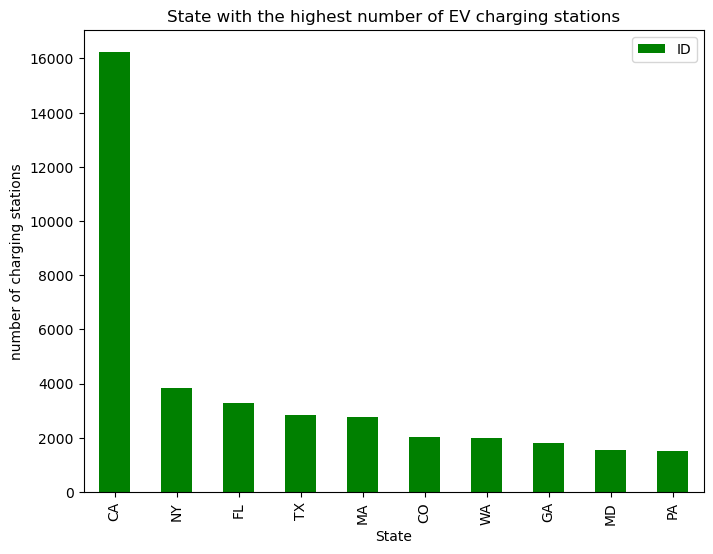

In [18]:
#Create a bar-chart
import matplotlib.pyplot as plt
# Kind of chart and its size
station1.plot(kind='bar', figsize=(8,6), color='green')
# Add a label for the x axis
plt.xlabel("State")
# Add a label for the y axis
plt.ylabel("number of charging stations")
# Add a title for your chart
plt.title("State with the highest number of EV charging stations")
# Plot the chart
plt.show()